# Getting Started with LangGraph
## LangGraph: A Framework for Stateful, Graph-Based AI Workflows


This Jupyter Notebook is designed to help you understand key concepts in LangGraph, a powerful framework for building stateful, graph-based AI workflows using Large Language Models (LLMs). It is assumed you are familiar with LangChain, but LangGraph is new to you. The notebook is divided into three parts: Beginner, Intermediate, and Advanced, guiding you step-by-step from basic concepts to complex multi-agent systems.

## What is LangGraph?
LangGraph is a library built on top of LangChain that allows you to create stateful, graph-based workflows for AI applications. Unlike traditional linear chains in LangChain, LangGraph models interactions as a graph, where nodes represent actions (e.g., calling an LLM, using a tool) and edges define how to move between them. This is particularly useful for applications requiring state management, cycles, or complex decision-making.

Key Components:
- Nodes: Individual steps or actions (e.g., call an LLM, execute a tool).
- Edges: Connections between nodes, defining the flow (can be conditional).
- State: A shared data structure that persists across nodes, tracking information like user input, LLM outputs, or tool results.
- Graph: The overall structure combining nodes and edges.

Why LangGraph?:
- Enables stateful workflows where previous steps influence future ones.
- Supports cycles for iterative processes (e.g., retrying a tool if the answer is incorrect).
- Ideal for agentic systems where an AI decides which tools to use dynamically.

## When to Use LangGraph?
Use LangGraph when your application needs:
- Complex workflows: When a simple linear chain (e.g., LangChain’s Chain) isn’t enough.
- State persistence: To maintain context across multiple steps (e.g., user query history).
- Decision-making agents: For scenarios where an AI must choose tools or actions dynamically.
- Iterative processes: When you need loops, retries, or conditional branching (e.g., verify and retry if a tool’s output is wrong).

Examples:
- Building a chatbot that uses tools (e.g., search, calculator) based on user queries.
- Creating multi-agent systems where agents collaborate to solve a task.
- Managing workflows with conditional logic, like routing queries to different LLMs or tools.

## Example 1: Implementing an AI Agent with Langgraph & Langchain

In [1]:
!python -m pip install pyowm wikipedia --quiet

In [2]:
# initializing the llm
from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model="gpt4o")


# load a tool
from langchain.utilities import WikipediaAPIWrapper
from langchain.tools import OpenWeatherMapQueryRun,WikipediaQueryRun

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
#owm = OpenWeatherMapQueryRun() # make sure to have env variable for OPENWEATHERMAP_API_KEY

tools = [wiki]

# initialize agent
from langgraph.prebuilt import create_react_agent
agent = create_react_agent(model,tools)

In [3]:
from langchain_core.messages import HumanMessage
response = agent.invoke({"messages":HumanMessage(content="hi")})
response['messages']

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='90f4a9b1-1f2e-45a3-bf68-e2a83d2fcfd7'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 82, 'total_tokens': 93, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CNWHJeqXvXX48NQ9TvHm3ifcGIDn1', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}]

In [4]:
response = agent.invoke({"messages":HumanMessage(content="Where is the city Kualalumpur located?")})
response['messages']

[HumanMessage(content='Where is the city Kualalumpur located?', additional_kwargs={}, response_metadata={}, id='fe8eea06-12da-4755-b015-902d0dea1b97'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qnJVtvAFmWmJMRfSAQPNd3cY', 'function': {'arguments': '{"query":"Kuala Lumpur"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 92, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-CNWHJVyGItyMRPaCSl5xDJMQ90gVl', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'se

In [5]:
for step in agent.stream({"messages":[HumanMessage(content="Where is the city Kualalumpur located?")]},
                         stream_mode='values'):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Where is the city Kualalumpur located?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_7HfxLCPdcf5b6qCVtQ2Tzdqn)
 Call ID: call_7HfxLCPdcf5b6qCVtQ2Tzdqn
  Args:
    query: Kuala Lumpur
================================= Tool Message =================================
Name: wikipedia

Page: Kuala Lumpur
Summary: Kuala Lumpur (KL), officially the Federal Territory of Kuala Lumpur, is the capital city and a federal territory of Malaysia. It is the most populous city in the country, covering an area of 243 km2 (94 sq mi) with a census population of 2,075,600 as of 2024. Greater Kuala Lumpur, also known as the Klang Valley, is an urban agglomeration of 8.8 million people as of 2024. It is among the fastest growing metropolitan regions in Southeast Asia, both in population and economic development.
The city serves as the cultural, financial, tourism, 

In [6]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()



wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
owm = OpenWeatherMapQueryRun() # make sure to have env variable for OPENWEATHERMAP_API_KEY

tools = [wiki,owm]


agent = create_react_agent(model,tools,checkpointer=memory)

config = {"configurable":{"thread_id":"abc11q"}}

for step in agent.stream({"messages":[HumanMessage(content="Where is the city Manila located?")]},
                         stream_mode='values',config=config):
    step["messages"][-1].pretty_print()

/home/zadmin/Desktop/GAAI-B4-Azure/genai/lib/python3.12/site-packages/pyowm/commons/cityidregistry.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


================================ Human Message =================================

Where is the city Manila located?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_DvkgHjNl4et8Bf72bPJHW0yR)
 Call ID: call_DvkgHjNl4et8Bf72bPJHW0yR
  Args:
    query: Manila
================================= Tool Message =================================
Name: wikipedia

Page: Manila
Summary: Manila, officially the City of Manila, is the capital and second-most populous city of the Philippines after Quezon City, with a population of 1,902,590 people in 2024. Located on the eastern shore of Manila Bay on the island of Luzon, it is classified as a highly urbanized city. With 43,611.5 inhabitants per square kilometer (112,953/sq mi), Manila is one of the world's most densely populated cities proper.
Manila was the first chartered city in the country, designated by Philippine Commission Act No. 183 on July 31, 1901. It became autonomous with the p

In [7]:
for step in agent.stream({"messages":[HumanMessage(content="I live there.")]},
                         stream_mode='values',config=config):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

I live there.
================================== Ai Message ==================================

That's great! Living in Manila offers a rich cultural experience and access to various amenities, entertainment, and historical sites. If you have any specific questions or need information about the city, feel free to ask!


In [8]:
# recursion limit = iteration X 2 + 1

for step in agent.stream({"messages":[HumanMessage(content="Whats the weather there?.")]},
                         stream_mode='values',config=config,recusion_limit=5):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Whats the weather there?.
================================== Ai Message ==================================
Tool Calls:
  open_weather_map (call_vjRTUAiJIaGVhGHTmjJWeyJw)
 Call ID: call_vjRTUAiJIaGVhGHTmjJWeyJw
  Args:
    location: Manila,PH
================================= Tool Message =================================
Name: open_weather_map

Error: NotFoundError('Unable to find the resource')
 Please fix your mistakes.
================================== Ai Message ==================================
Tool Calls:
  open_weather_map (call_RgjO8XTX4qf76YXlncmixMO4)
 Call ID: call_RgjO8XTX4qf76YXlncmixMO4
  Args:
    location: Manila
================================= Tool Message =================================
Name: open_weather_map

Error: NotFoundError('Unable to find the resource')
 Please fix your mistakes.
================================== Ai Message ==================================

It seems ther

## Example 2: Agent with Tool Decision and Verification

Example: an agent that decides which tool to use based on the user’s query, uses the tool, verifies the result, and retries if incorrect. This introduces conditional edges and tool usage.

## Scenario
- The user asks a math question (e.g., "What is 5 * 3?").
- An agent LLM decides to use a calculator tool.
- The tool computes the result.

A verifier LLM checks if the result is correct. If incorrect, it loops back to the tool.

## Step-by-Step Explanation
- Define the State: Include query, tool decision, tool output, and final answer.
- Create Nodes:
    - Agent Node: Decides which tool to use.
    - Tool Node: Executes the tool (a simple calculator).
    - Verifier Node: Checks the tool’s output and decides to retry or output.
- Define Tools: A mock calculator tool for demonstration.
- Build the Graph: Use conditional edges to loop back if the verifier detects an error.
- Execute: Run with a math query.

In [9]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.tools import tool
import regex as re

# Initialize LLMs
llm = AzureChatOpenAI(model="gpt4o")

In [10]:
# Define the state
class AgentState(TypedDict):
    query: str
    tool_decision: str
    tool_output: str
    final_answer: str
    retry_count: int

In [11]:
# Define a mock calculator tool
@tool
def calculator(expression: str) -> str:
    """Evaluates a mathematical expression. Nothing else"""
    try:
        # For demo, we'll hardcode a wrong answer 10% of the time
        import random
        result = eval(expression, {"__builtins__": {}}, {})  # Safe eval with restricted globals
        if random.random() < 0.1:
            return str(result + 1)  # Intentionally wrong
        return str(result)
    except Exception as e:
        return f"Error: {str(e)}"

In [12]:
# Reasoning
# Agent node: Decide which tool to use
def agent_node(state: AgentState) -> AgentState:
    print(f"Agent Node: Received state: {state}")
    prompt = PromptTemplate(
        input_variables=["query"],
        template="Decide which tool to use for this query: {query}. Return only the tool name."
    )
    tool_decision = llm.invoke(prompt.format(query=state["query"])).content
    print(f"Agent Node: Decided tool: {tool_decision}")
    return {"tool_decision": tool_decision}

In [13]:
# Action
# Tool node: Execute the tool
def tool_node(state: AgentState) -> AgentState:
    print(f"Tool Node: Received state: {state}")
    if state["tool_decision"].lower() == "calculator":
        # Extract the mathematical expression from the query
        query = state["query"]
        print(f"Tool Node: Processing query: {query}")
        # Use regex to find a mathematical expression (e.g., "5 * 3" from "What is 5 * 3?")
        match = re.search(r"(\d+\s*[\+\-\*/]\s*\d+)", query)
        if match:
            expression = match.group(1)
            print(f"Tool Node: Extracted expression: {expression}")
            result = calculator.invoke(expression)
            print(f"Tool Node: Calculator result: {result}")
        else:
            result = "Error: Could not extract a valid mathematical expression."
            print(f"Tool Node: Extraction failed: {result}")
    else:
        result = "No suitable tool found."
        print(f"Tool Node: No tool matched: {result}")
    return {"tool_output": result}

In [14]:

# Observation
# Verifier node: Check the tool output
def verifier_node(state: AgentState) -> AgentState:
    print(f"Verifier Node: Received state: {state}")
    prompt = PromptTemplate(
        input_variables=["query", "tool_output"],
        template="Verify if the answer to '{query}' is correct: {tool_output}. If correct, provide the final answer. If incorrect, indicate 'retry'."
    )
    verification = llm.invoke(prompt.format(query=state["query"], tool_output=state["tool_output"])).content
    print(f"Verifier Node: Verification result: {verification}")
    retry_count = state.get("retry_count", 0)
    if "retry" in verification.lower():
        print(f"Verifier Node: Retry triggered, retry_count: {retry_count + 1}")
        return {"retry_count": retry_count + 1}
    print(f"Verifier Node: Answer accepted as final: {state['tool_output']}")
    return {"final_answer": state["tool_output"]}

In [15]:
# Conditional edge: Decide next step after verifier
def route_verifier(state: AgentState) -> Literal["tool_node", END]:
    print(f"Route Verifier: Received state: {state}")
    if "final_answer" not in state or not state["final_answer"]:
        if state.get("retry_count", 0) < 3:  # Limit retries
            print(f"Route Verifier: Routing to tool_node, retry_count: {state.get('retry_count', 0)}")
            return "tool_node"
    print(f"Route Verifier: Routing to END")
    return END

In [16]:
# Build the graph
builder = StateGraph(AgentState)
builder.add_node("agent_node", agent_node)
builder.add_node("tool_node", tool_node)
builder.add_node("verifier_node", verifier_node)



builder.add_edge(START, "agent_node")
builder.add_edge("agent_node", "tool_node")
builder.add_edge("tool_node", "verifier_node")
builder.add_conditional_edges("verifier_node", route_verifier)
graph = builder.compile()

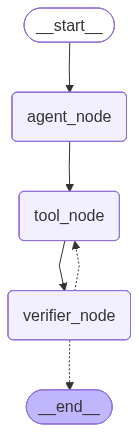

In [17]:
graph

In [18]:
# Run the graph
input_state = {"query": "What is 5 * 3?", "retry_count": 0}
result = graph.invoke(input_state)
print("User Query:", result["query"])
print("Final Answer:", result["final_answer"])

Agent Node: Received state: {'query': 'What is 5 * 3?', 'retry_count': 0}
Agent Node: Decided tool: Calculator
Tool Node: Received state: {'query': 'What is 5 * 3?', 'tool_decision': 'Calculator', 'retry_count': 0}
Tool Node: Processing query: What is 5 * 3?
Tool Node: Extracted expression: 5 * 3
Tool Node: Calculator result: 15
Verifier Node: Received state: {'query': 'What is 5 * 3?', 'tool_decision': 'Calculator', 'tool_output': '15', 'retry_count': 0}
Verifier Node: Verification result: The answer to 'What is 5 * 3?' is correct: 15. Final answer: 15.
Verifier Node: Answer accepted as final: 15
Route Verifier: Received state: {'query': 'What is 5 * 3?', 'tool_decision': 'Calculator', 'tool_output': '15', 'final_answer': '15', 'retry_count': 0}
Route Verifier: Routing to END
User Query: What is 5 * 3?
Final Answer: 15


## Explanation of Code

- State (AgentState): Tracks query, tool_decision, tool_output, final_answer, and retry_count.
- Nodes:
    - agent_node: Uses an LLM to decide the tool (hardcoded to “calculator” for simplicity).
    - tool_node: Calls the calculator tool to evaluate the expression.
    - verifier_node: Checks if the tool’s output is correct. If incorrect, it triggers a retry.
- Conditional Edge (route_verifier): After the verifier, if the answer is incorrect and retries are under 3, it loops back to tool_node. Otherwise, it ends.
- Tool: The calculator tool evaluates math expressions but occasionally returns a wrong answer (for demo purposes) to test the retry logic.
- Execution: The graph processes the query, selects the tool, verifies the result, and retries if needed.

# Building More Complex Workflows
- complex workflows with conditional edges and state management. 
- dynamic routing based on the query type.

### Conditional Edges and State Management
- Conditional Edges: Allow the graph to choose the next node dynamically based on the state. For example, route to different tools based on the query type (math vs. general knowledge).
- State Management: The state can store more complex data, like a list of messages or tool call history, to inform future decisions.

## Example 3: Agent with Conditional Tool Selection

In this project, the agent decides between two tools (calculator for math queries, LLM for general knowledge) based on the query. The graph routes the query to the appropriate node and verifies the result.

### Step-by-Step Explanation
- Define the State: Include query, tool decision, tool output, and final answer.
- Create Nodes:
    - Agent: Decides whether to use the calculator or LLM.
    - Calculator Tool: Handles math queries.
    - LLM Node: Handles general knowledge queries.
    - Verifier: Checks the output and decides to retry or accept.
- Define Tools: Reuse the calculator tool and add an LLM as a “tool” for general queries.
- Build the Graph: Use conditional edges to route based on tool decision and verification.
- Execute: Test with both math and general knowledge queries.

In [19]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.tools import tool

# Initialize LLMs
llm = AzureChatOpenAI(model="gpt4o")

In [20]:
# Define the state
class IntermediateState(TypedDict):
    query: str
    tool_decision: str
    tool_output: str
    final_answer: str
    retry_count: int


In [21]:
# Define the calculator tool
@tool
def calculator(expression: str) -> str:
    """Evaluates a mathematical expression."""
    try:
        return str(eval(expression, {"__builtins__": {}}, {}))  # Safe eval
    except Exception as e:
        return f"Error: {str(e)}"

In [22]:
# Agent node: Decide which tool to use
def agent_node(state: IntermediateState) -> IntermediateState:
    print(f"Agent Node: Received state: {state}")
    prompt = PromptTemplate(
        input_variables=["query"],
        template="Decide which tool to use for this query: {query}. Return 'calculator' for math queries or 'llm' for general knowledge."
    )
    tool_decision = llm.invoke(prompt.format(query=state["query"])).content
    print(f"Agent Node: Decided tool: {tool_decision}")
    return {"tool_decision": tool_decision}


In [23]:
# Calculator tool node
def calculator_node(state: IntermediateState) -> IntermediateState:
    print(f"Calculator Node: Received state: {state}")
    query = state["query"]
    print(f"Calculator Node: Processing query: {query}")
    # Extract mathematical expression (e.g., "7 * 4" from "What is 7 * 4?")
    match = re.search(r"(\d+\s*[\+\-\*/]\s*\d+)", query)
    if match:
        expression = match.group(1)
        print(f"Calculator Node: Extracted expression: {expression}")
        result = calculator.invoke(expression)
        print(f"Calculator Node: Calculator result: {result}")
    else:
        result = "Error: Could not extract a valid mathematical expression."
        print(f"Calculator Node: Extraction failed: {result}")
    return {"tool_output": result}

In [24]:
# LLM tool node
def llm_node(state: IntermediateState) -> IntermediateState:
    print(f"LLM Node: Received state: {state}")
    prompt = PromptTemplate(
        input_variables=["query"],
        template="Answer the following question: {query}"
    )
    try:
        response = llm.invoke(prompt.format(query=state["query"]))
        print(f"LLM Node: Raw LLM response: {response}")
        # Ensure response is an AIMessage and extract content
        result = response.content if hasattr(response, "content") else str(response)
        print(f"LLM Node: Extracted result: {result}")
    except Exception as e:
        result = f"Error in LLM invocation: {str(e)}"
        print(f"LLM Node: Error: {result}")
    return {"tool_output": result}

In [25]:

# Verifier node
def verifier_node(state: IntermediateState) -> IntermediateState:
    print(f"Verifier Node: Received state: {state}")
    prompt = PromptTemplate(
        input_variables=["query", "tool_output"],
        template="Verify if the answer to '{query}' is correct: {tool_output}. If correct, provide the final answer. If incorrect, indicate 'retry'."
    )
    verification = llm.invoke(prompt.format(query=state["query"], tool_output=state["tool_output"])).content
    print(f"Verifier Node: Verification result: {verification}")
    retry_count = state.get("retry_count", 0)
    if "retry" in verification.lower():
        print(f"Verifier Node: Retry triggered, retry_count: {retry_count + 1}")
        return {"retry_count": retry_count + 1}
    print(f"Verifier Node: Answer accepted as final: {state['tool_output']}")
    return {"final_answer": state["tool_output"]}

In [26]:
# Conditional edge: Route based on tool decision
def route_tool(state: IntermediateState) -> Literal["calculator_node", "llm_node"]:
    print(f"Route Tool: Received state: {state}")
    if state["tool_decision"].lower() == "calculator":
        print(f"Route Tool: Routing to calculator_node")
        return "calculator_node"
    print(f"Route Tool: Routing to llm_node")
    return "llm_node"

# Conditional edge: Route after verifier
def route_verifier(state: IntermediateState) -> Literal["calculator_node", "llm_node", END]:
    print(f"Route Verifier: Received state: {state}")
    if "final_answer" not in state or not state["final_answer"]:
        if state.get("retry_count", 0) < 3:
            print(f"Route Verifier: Routing to {route_tool(state)}, retry_count: {state.get('retry_count', 0)}")
            return route_tool(state)  # Retry with the same tool
    print(f"Route Verifier: Routing to END")
    return END

In [27]:
# Build the graph
builder = StateGraph(IntermediateState)
builder.add_node("agent_node", agent_node)
builder.add_node("calculator_node", calculator_node)
builder.add_node("llm_node", llm_node)
builder.add_node("verifier_node", verifier_node)



builder.add_edge(START, "agent_node")
builder.add_conditional_edges("agent_node", route_tool)
builder.add_edge("calculator_node", "verifier_node")
builder.add_edge("llm_node", "verifier_node")
builder.add_conditional_edges("verifier_node", route_verifier)
graph = builder.compile()

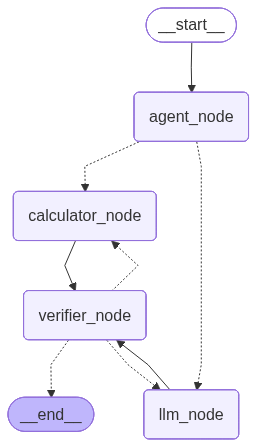

In [28]:
graph

In [29]:
# Run the graph with different queries
queries = ["What is 7 * 4?", "Who won the Nobel Peace Prize in 2020?"]
for query in queries:
    input_state = {"query": query, "retry_count": 0}
    result = graph.invoke(input_state)
    print(f"User Query: {result['query']}")
    print(f"Final Answer: {result['final_answer']}\n")

Agent Node: Received state: {'query': 'What is 7 * 4?', 'retry_count': 0}
Agent Node: Decided tool: calculator
Route Tool: Received state: {'query': 'What is 7 * 4?', 'tool_decision': 'calculator', 'retry_count': 0}
Route Tool: Routing to calculator_node
Calculator Node: Received state: {'query': 'What is 7 * 4?', 'tool_decision': 'calculator', 'retry_count': 0}
Calculator Node: Processing query: What is 7 * 4?
Calculator Node: Extracted expression: 7 * 4
Calculator Node: Calculator result: 28
Verifier Node: Received state: {'query': 'What is 7 * 4?', 'tool_decision': 'calculator', 'tool_output': '28', 'retry_count': 0}
Verifier Node: Verification result: The answer to 'What is 7 * 4?' is correct: 28. Final answer: 28.
Verifier Node: Answer accepted as final: 28
Route Verifier: Received state: {'query': 'What is 7 * 4?', 'tool_decision': 'calculator', 'tool_output': '28', 'final_answer': '28', 'retry_count': 0}
Route Verifier: Routing to END
User Query: What is 7 * 4?
Final Answer: 28


## Explanation of Code
- State (IntermediateState): Similar to the beginner project but used to manage dynamic routing.
- Nodes:
    - agent_node: Decides whether to use the calculator or LLM based on the query type.
    - calculator_node: Processes math queries.
    - llm_node: Processes general knowledge queries.
    - verifier_node: Verifies the output and decides to retry or accept.
- Conditional Edges:
    - route_tool: Routes to calculator_node or llm_node based on the agent’s decision.
    - route_verifier: Loops back to the appropriate tool node if the verifier detects an error.
- Execution: Tests both a math query and a general knowledge query to demonstrate dynamic routing.

# Example 4: Agent implementation using graph API

In [30]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults(max_results=2)
tavily.invoke("Who won Noble Peace price in 2020?")

/tmp/ipykernel_3492/1899620525.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults(max_results=2)


[{'title': '2020 Nobel Peace Prize - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/2020_Nobel_Peace_Prize',
  'content': '6. ^ Rayhan Uddin (8 October 2020). "Nobel Peace Prize 2020: The Middle East names and stories to look out for". Middle East Eye. Retrieved 8 October 2020.\n7. ^ "Jacinda Ardern tipped to win Nobel Peace Prize despite competition from Thunberg, Trump". The New Zealand Herald. 29 September 2020. Retrieved 30 September 2021.\n8. ^ Rob Picheta (3 October 2020). "Ardern, Navalny, WHO - but not Trump. A diverse list of contenders for the Nobel Peace Prize". CNN. Retrieved 4 October 2020. [...] |  v  t  e  2020 Nobel Prize laureates | |\n --- |\n| Chemistry |  Emmanuelle Charpentier (France)  Jennifer Doudna (United States) |\n| Literature (2020) | Louise Glück (United States) |\n| Peace (2020) | World Food Programme |\n| Physics |  Roger Penrose (United Kingdom)  Reinhard Genzel (Germany)  Andrea M. Ghez (United States) | [...] The 2020 Nobel Peace Prize was awarde

In [31]:
from langchain_community.tools import tool
import requests, json
@tool
def get_current_weather(city:str)->dict:
    """ this funciton can be used to get current weather information"""
    api_key="6a8b0ac166a37e2b7a38e64416b3c3fe"
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    response = requests.get(url)
    response = json.loads(response.content.decode())
    output = {"city":city,"weather":response['weather'][0]['description'],
              "temperature":response['main']['temp'], "unit":"kelvin"
              }
    return output

In [32]:
get_current_weather.name

'get_current_weather'

In [33]:
get_current_weather.description

'this funciton can be used to get current weather information'

In [34]:
get_current_weather.args

{'city': {'title': 'City', 'type': 'string'}}

In [35]:
tools = [tavily,get_current_weather]
from langchain_openai import AzureChatOpenAI
llm = AzureChatOpenAI(model="gpt4o")

llm_with_tools = llm.bind_tools(tools)

In [36]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
class agentState(TypedDict):
    messages: Annotated[list, add_messages]

# first node
def chat(state:agentState):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}



In [37]:
import json
from langchain_core.messages import ToolMessage

class ToolNode:
    def __init__(self,tools:list):
        self.tools_by_name = {tool.name:tool for tool in tools}
    
    def __call__(self,inputs:dict):
        if messages:=inputs.get("messages",[]):
            message = messages[-1]
        else:
            raise ValueError("no message found")
        
        outputs = []
        for tool in message.tool_calls:
            tool_op = self.tools_by_name[tool['name']].invoke(tool['args'])
            outputs.append(ToolMessage(content = json.dumps(tool_op),name=tool['name'],
                                       tool_call_id=tool['id']))
        return {"messages":outputs}
    

tool_node = ToolNode(tools=tools)


In [38]:
def route_tools(state:agentState):
    message = state['messages'][-1]
    if hasattr(message,"tool_calls") and len(message.tool_calls)>0:
        return "tools"
    return END
    

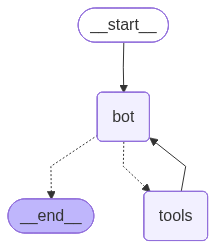

In [39]:
builder = StateGraph(agentState)

# add nodes
builder.add_node("bot",chat)
builder.add_node("tools",tool_node)

# add edges
builder.add_edge(START,"bot")
builder.add_conditional_edges("bot",route_tools,{"tools":"tools",END:END})
builder.add_edge("tools","bot")
agent = builder.compile()
agent

In [40]:
for step in agent.stream({"messages":[{"role":"user","content":"how is weather in Mumbai today?"}]},
                         stream_mode='values'):
    print(step["messages"][-1].pretty_print())

================================ Human Message =================================

how is weather in Mumbai today?
None
================================== Ai Message ==================================
Tool Calls:
  get_current_weather (call_8IfyF6hr4PO4hgEOOac9y3z1)
 Call ID: call_8IfyF6hr4PO4hgEOOac9y3z1
  Args:
    city: Mumbai
None
================================= Tool Message =================================
Name: get_current_weather

{"city": "Mumbai", "weather": "clear sky", "temperature": 299.14, "unit": "kelvin"}
None
================================== Ai Message ==================================

The weather in Mumbai today is clear sky with a temperature of approximately 26.99°C (299.14 K).
None


In [41]:
for step in agent.stream({"messages":[{"role":"user","content":"who won the noble peace prize in 2020?"}]},
                         stream_mode='values'):
    print(step["messages"][-1].pretty_print())

================================ Human Message =================================

who won the noble peace prize in 2020?
None
================================== Ai Message ==================================

The Nobel Peace Prize for 2020 was awarded to the World Food Programme (WFP) for its efforts to combat hunger, promote peace in conflict-affected areas, and act as a driving force in efforts to prevent the use of hunger as a weapon of war and conflict.
None
